# Code References

https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o

https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data

https://stackoverflow.com/questions/50588602/calculating-loglikelihood-of-distributions-in-python

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Suicide_rates.csv to Suicide_rates.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
df = pd.read_csv('Suicide_rates.csv')

display(df)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [ ]:
# Dropping the country-year column
del df['country-year']

# Changing all column names to remove unnecessary spaces in them
df.rename(columns = lambda x: x.strip(), inplace = True)

# Removing commas in GDP per year values of all records
df['gdp_for_year ($)'] = df['gdp_for_year ($)'].str.replace(',', '').astype(float)

df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
HDI for year          float64
gdp_for_year ($)      float64
gdp_per_capita ($)      int64
generation             object
dtype: object

# Point Estimates for Suicide/100k

In [ ]:
def calc_suicides_100k(row):

    return (float(row['suicides_no'])/float(row['population']))*100000

In [ ]:
import random

# Calculating the yearly suicide rate (suicides/100k pop) by year and country
df_year = df.groupby(['country', 'year'])['suicides_no', 'population'].sum()
df_year.reset_index(inplace=True)

# Filtering on the basis of population
df_year = df_year.loc[df_year['population'] > 10000000]

# Choosing only countries with data for all years between 1985 and 2015
valid_year = [i for i in range(1985, 2016)]
df_year = df_year.loc[df_year['year'].isin(valid_year)]

# Choosing only countries with 31 unique year values (1 for each from 1985 to 2015)
valid_country = []
for country in pd.unique(df_year['country']):

    df_year_country = df_year.loc[df_year['country'] == country]

    if len(pd.unique(df_year_country['year'])) == 31:
        valid_country.append(country)

# Randomly choosing a set of 6 countries satisfying the criteria
random_country = random.sample(valid_country, 6)

df_year = df_year.loc[df_year['country'].isin(random_country)]

# Calculating the suicides/100k column from the suicides and population column
df_year['suicides/100k pop'] = df_year.apply(lambda row: calc_suicides_100k(row), axis=1)

# Computing the point estimate of mean for suicides/100k
df_year_mean = df_year.groupby(['country'])['suicides/100k pop'].mean().reset_index(name ='suicides/100k mean')

# Computing the point estimate of variance for suicides/100k
df_year_variance = df_year.groupby(['country'])['suicides/100k pop'].agg(np.var, ddof=0).reset_index(name ='suicides/100k variance')

display(df_year)
print('Mean values of suicides/100k are:')
display(df_year_mean)
print('-'*45, '\n')
print('Variance values of suicides/100k are:')
display(df_year_variance)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,country,year,suicides_no,population,suicides/100k pop
348,Brazil,1985,4228,117478900,3.598944
349,Brazil,1986,4271,118776400,3.595832
350,Brazil,1987,4672,122822467,3.803864
351,Brazil,1988,4466,125701294,3.552867
352,Brazil,1989,4463,128570308,3.471252
...,...,...,...,...,...
2235,United Kingdom,2011,4393,58881852,7.460703
2236,United Kingdom,2012,4444,59708630,7.442810
2237,United Kingdom,2013,4824,60091793,8.027719
2238,United Kingdom,2014,4788,60570482,7.904841


Mean values of suicides/100k are:


,country,suicides/100k mean
0,Brazil,4.570885
1,Colombia,4.674172
2,Italy,7.712660
3,Japan,21.886203
4,Mexico,3.858873
5,United Kingdom,7.884083


--------------------------------------------- 

Variance values of suicides/100k are:


,country,suicides/100k variance
0,Brazil,0.474871
1,Colombia,1.269771
2,Italy,0.465664
3,Japan,10.352720
4,Mexico,0.873416
5,United Kingdom,0.456160


# QQ Plots for Yearly Suicide Rates

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


QQ Plot for yearly suicide rates of Brazil:


<Figure size 1080x720 with 0 Axes>

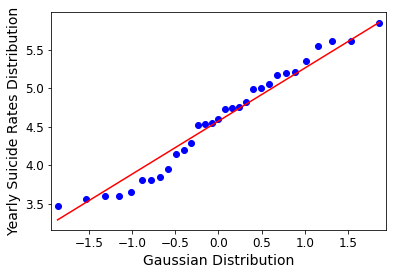

--------------------
QQ Plot for yearly suicide rates of Colombia:


<Figure size 1080x720 with 0 Axes>

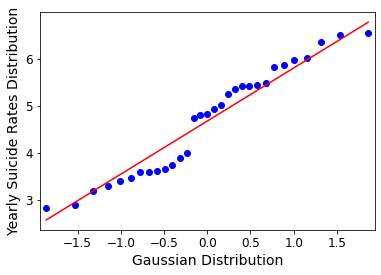

--------------------
QQ Plot for yearly suicide rates of Italy:


<Figure size 1080x720 with 0 Axes>

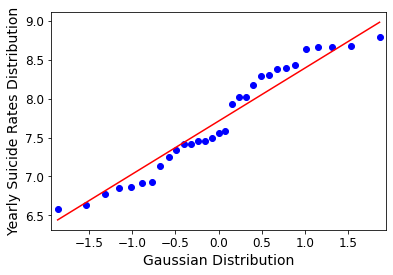

--------------------
QQ Plot for yearly suicide rates of Japan:


<Figure size 1080x720 with 0 Axes>

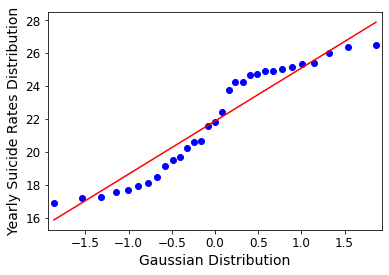

--------------------
QQ Plot for yearly suicide rates of Mexico:


<Figure size 1080x720 with 0 Axes>

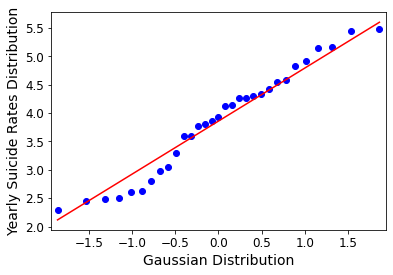

--------------------
QQ Plot for yearly suicide rates of United Kingdom:


<Figure size 1080x720 with 0 Axes>

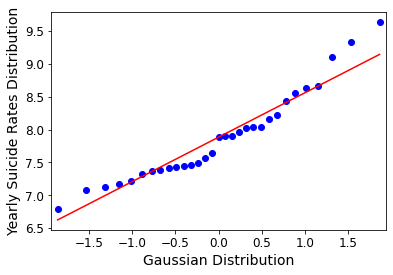

--------------------


In [ ]:
import statsmodels.api as sm

for country in pd.unique(df_year['country']):

    # Creating a new data-frame with the specified country
    df_year_country = df_year.loc[df_year['country'] == country]
    
    # Setting the figure size
    plt.figure(figsize = (15, 10))

    print('QQ Plot for yearly suicide rates of {}:'.format(country))
    
    # Plotting the QQ plot
    sm.qqplot(df_year_country['suicides/100k pop'], line = 's')

    # Setting various axis parameters
    plt.tick_params(axis='x', which='major', labelsize=12)
 
    plt.xlabel("Gaussian Distribution", fontsize = 14)
    
    plt.tick_params(axis='y', which='major', labelsize=12)
    
    plt.ylabel("Yearly Suicide Rates Distribution", fontsize = 14)
    
    plt.show()

    print('-'*20)

# Log Likelihood

In [ ]:
import scipy.stats.distributions

for country in pd.unique(df_year['country']):

    # Creating a new data-frame with the specified country
    df_year_country = df_year.loc[df_year['country'] == country]
    
    # Fitting the data to a normal distribution (assumed)
    dist = getattr(scipy.stats, 'norm')
    params = dist.fit(df_year_country['suicides/100k pop'])

    # Calculating the log likelihood using the calculated fitting parameters
    LLH = dist.logpdf(df_year_country['suicides/100k pop'], *params).sum()
    print('Log Likelihood value for {} is:'.format(country), LLH)

Log Likelihood value for Brazil is: -32.44404884999351
Log Likelihood value for Colombia is: -47.68905694836522
Log Likelihood value for Italy is: -32.14058949056136
Log Likelihood value for Japan is: -80.21445793890175
Log Likelihood value for Mexico is: -41.88927280135171
Log Likelihood value for United Kingdom is: -31.820965606886762


Comparing the log likelihood values obtained, we see that more negative the value of the log likelihood, the worse it fits to the straight line on the QQ plot, implying a greater deviation from a Gaussian distribution which is what is to be expected

# 95% Confidence Interval

In [ ]:
import numpy as np
import scipy.stats

# Function to calculate mean confidence interval
def mean_confidence_interval(data, confidence=0.95):
    
    a = 1.0 * np.array(data)
    n = len(a)
    
    # Calculating the mean and standard error of mean
    m, se = np.mean(a), scipy.stats.sem(a)
    
    # Using the mean CI formula for the T-distribution
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [ ]:
for country in pd.unique(df_year['country']):

    # Creating a new data-frame with the specified country
    df_year_country = df_year.loc[df_year['country'] == country]
    
    mean, lower_limit, upper_limit = mean_confidence_interval(df_year_country['suicides/100k pop'])
    
    print('Sample mean for yearly suicide rates of {} is:'.format(country), mean)
    print('95% CI Interval of mean for yearly suicide rates of {} is:'.format(country), '(', lower_limit, ', ', upper_limit, ')')
    print('-'*20)

Sample mean for yearly suicide rates of Brazil is: 4.570885198723902
95% CI Interval of mean for yearly suicide rates of Brazil is: ( 4.313939849600639 ,  4.827830547847165 )
--------------------
Sample mean for yearly suicide rates of Colombia is: 4.67417233412583
95% CI Interval of mean for yearly suicide rates of Colombia is: ( 4.25401137757669 ,  5.094333290674969 )
--------------------
Sample mean for yearly suicide rates of Italy is: 7.712660437386647
95% CI Interval of mean for yearly suicide rates of Italy is: ( 7.458218058475737 ,  7.967102816297558 )
--------------------
Sample mean for yearly suicide rates of Japan is: 21.88620318700118
95% CI Interval of mean for yearly suicide rates of Japan is: ( 20.686482135935748 ,  23.08592423806661 )
--------------------
Sample mean for yearly suicide rates of Mexico is: 3.8588729589586546
95% CI Interval of mean for yearly suicide rates of Mexico is: ( 3.510404383059563 ,  4.207341534857746 )
--------------------
Sample mean for year

# Welch T-Test

In [ ]:
def Welch_ttest(a, b):

    # Calculating the t-statistic and significance using the Welch test
    t, p_value = scipy.stats.ttest_ind(a, b, equal_var=False, nan_policy='propagate')

    if p_value <= 0.05:
        print('Null hypothesis rejected; mean values are really different')

    else:
        print('Mean values cannot be said to be different definitively')

In [ ]:
# Selecting Brazil & Colombia as their mean suicide rates are the closest

df_year_country_1 = df_year.loc[df_year['country'] == 'Brazil']
data_1 = df_year_country_1['suicides/100k pop']

df_year_country_2 = df_year.loc[df_year['country'] == 'Colombia']
data_2 = df_year_country_2['suicides/100k pop']

Welch_ttest(np.array(data_1), np.array(data_2))

Mean values cannot be said to be different definitively


# Wilcoxon Signed Rank Test

In [ ]:
def Wilcoxon_signed_rank_test(a, b):

    # Calculating the t-statistic and significance using the Wilcoxon signed rank test
    t, p_value = scipy.stats.wilcoxon(a, b)

    if p_value <= 0.05:
        print('Null hypothesis rejected; mean values are really different')

    else:
        print('Mean values cannot be said to be different definitively')

In [ ]:
# Selecting Brazil & Colombia as their mean suicide rates are the closest

df_year_country_1 = df_year.loc[df_year['country'] == 'Brazil']
data_1 = df_year_country_1['suicides/100k pop']

df_year_country_2 = df_year.loc[df_year['country'] == 'Colombia']
data_2 = df_year_country_2['suicides/100k pop']

Wilcoxon_signed_rank_test(np.array(data_1), np.array(data_2))

Mean values cannot be said to be different definitively


# Paired T-Test

In [ ]:
def paired_ttest(a, b):

    # Calculating the t-statistic and significance using the paired T-test
    t, p_value = scipy.stats.ttest_rel(a, b, axis=0, nan_policy='propagate')

    if p_value <= 0.05:
        print('Null hypothesis rejected; mean values are really different')

    else:
        print('Mean values cannot be said to be different definitively')

In [ ]:
# Selecting Brazil & Colombia as their mean suicide rates are the closest

df_year_country_1 = df_year.loc[df_year['country'] == 'Brazil']
data_1 = df_year_country_1['suicides/100k pop']

df_year_country_2 = df_year.loc[df_year['country'] == 'Colombia']
data_2 = df_year_country_2['suicides/100k pop']

paired_ttest(np.array(data_1), np.array(data_2))

Mean values cannot be said to be different definitively


# Spearman's Correlation

In [ ]:
# Dropping all the records with missing HDI values
df_hdi = df.dropna(axis = 0, how = 'any')

# Calculating the yearly suicide rate (suicides/100k pop) by year, country, HDI, and GDP per capita
df_year_all = df_hdi.groupby(['country', 'year', 'HDI for year', 'gdp_per_capita ($)'])['suicides_no', 'population'].sum()
df_year_all.reset_index(inplace=True)

# Calculating the suicides/100k column from the suicides and population column
df_year_all['suicides/100k pop'] = df_year_all.apply(lambda row: calc_suicides_100k(row), axis=1)

display(df_year_all)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


,country,year,HDI for year,gdp_per_capita ($),suicides_no,population,suicides/100k pop
0,Albania,1995,0.619,835,88,2903400,3.030929
1,Albania,2000,0.656,1299,54,2796300,1.931123
2,Albania,2005,0.695,2931,0,2783320,0.000000
3,Albania,2010,0.722,4359,96,2736025,3.508740
4,Antigua and Barbuda,2012,0.781,13657,0,88703,0.000000
...,...,...,...,...,...,...,...
692,Uzbekistan,2010,0.655,1533,1464,25651783,5.707206
693,Uzbekistan,2011,0.661,1767,1640,25978049,6.313022
694,Uzbekistan,2012,0.668,1964,1835,26381830,6.955545
695,Uzbekistan,2013,0.672,2150,1950,26838924,7.265567


In [ ]:
def spearmanr(a, b):

    # Calculating the correlation and significance values
    correlation, p_value = scipy.stats.spearmanr(a, b, axis=0, nan_policy='propagate')

    if p_value <= 0.05:
        print('Correlation value: ', correlation)
        print('Significance of correlation: ', p_value)
        print('Null hypothesis rejected')

    else:
        print('Correlation value: ', correlation)
        print('Significance of correlation: ', p_value)
        print('Null hypothesis cannot be rejected due to insufficient significance')

In [ ]:
# Correlation between yearly suicides and HDI for year
print('Exploring correlation between yearly suicides and HDI for year:')
suicides_hdi_corr = spearmanr(np.array(df_year_all['suicides/100k pop']), np.array(df_year_all['HDI for year']))

# Correlation between yearly suicides and gdp_per_capita
print('\nExploring correlation between yearly suicides and gdp_per_capita:')
suicides_gdp_corr = spearmanr(np.array(df_year_all['suicides/100k pop']), np.array(df_year_all['gdp_per_capita ($)']))

Exploring correlation between yearly suicides and HDI for year:
Correlation value:  0.3318618026778759
Significance of correlation:  2.215829467752491e-19
Null hypothesis rejected

Exploring correlation between yearly suicides and gdp_per_capita:
Correlation value:  0.1880257615068339
Significance of correlation:  5.739795045402773e-07
Null hypothesis rejected
